# Netflix dataset Analytics

### There are some interesting analytical directions: 

+ Understanding what content is available in different countries
+ Identifying similar content by matching text-based features
+ Network analysis of Actors / Directors and find interesting insights
+ Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import plotly.express as px
import missingno as msno ##visualize missing data 


In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Visualize missing value 

In [169]:
# Vislualize missing value as matrix 
msno.matrix(df)

In [ ]:
# Vislualize missing value as barplot
msno.bar(df)

In [ ]:
# Visualize the correlation between the number of missing values in different columns as a heatmap
msno.heatmap(df)

+ Heatmap shows the correlation of missingness between every 2 columns. A value near 0 means there is no dependence between the occurrence of missing values of two variables.

In [3]:
# Check missing ratio
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

director's null rate :30.68%
cast's null rate :9.22%
country's null rate :6.51%
date_added's null rate :0.13%
rating's null rate :0.09%


### Data Clean

In [4]:
# Check NA values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### The missing values are in:

+ "director": Very less information-not needed for the analysis so I will be dropping this
+ "cast": there are too many diferent values so I will be dropping this
+ "country":Important variable hence we need to fix this
+ "date_added": there are just a few cases, so lets scrap them
+ "rating": there are just a few cases, so lets scrap them

In [3]:
# Drop columns 
df.drop(['director','cast'],axis = 1, inplace=True)

In [4]:
# Drop NAs in the column 
df = df[df['date_added'].notna()]

In [5]:
# FillNA - Categorical 
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [6]:
df[df['rating'].isna()]

show_id     type                                              title  \
67       s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
2359   s2360  TV Show                  Gargantia on the Verdurous Planet   
3660   s3661  TV Show                                       Little Lunch   
3736   s3737    Movie                                    Louis C.K. 2017   
3737   s3738    Movie                              Louis C.K.: Hilarious   
3738   s3739    Movie               Louis C.K.: Live at the Comedy Store   
4323   s4324    Movie                               My Honor Was Loyalty   

            country          date_added  release_year rating  duration  \
67    United States    January 26, 2017          2017    NaN    37 min   
2359          Japan    December 1, 2016          2013    NaN  1 Season   
3660      Australia    February 1, 2018          2015    NaN  1 Season   
3736  United States       April 4, 2017          2017    NaN    74 min   
3737  United States  September 16, 2016          2010    NaN    84 min   
3738  United States     August 15, 2016          2015    NaN    66 min   
4323          Italy       March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
67                                  Movies   
2359  Anime Series, International TV Shows   
3660                 Kids' TV, TV Comedies   
3736                                Movies   
3737                                Movies   
3738                                Movies   
4323                                Dramas   

                                            description  
67    Oprah Winfrey sits down with director Ava DuVe...  
2359  After falling through a wormhole, a space-dwel...  
3660  Adopting a child's perspective, this show take...  
3736  Louis C.K. muses on religion, eternal love, gi...  
3737  Emmy-winning comedy writer Louis C.K. brings h...  
3738  The comic puts his trademark hilarious/thought...  
4323  Amid the chaos and horror of World War II, a c...

In [7]:
# Drop NAs
df = df[df['rating'].notna()]

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# Create new columns 
df['new_country'] = df['country'].apply(lambda x: x.split(',')[0])
df.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020          2020   
1      s2    Movie   7:19         Mexico  December 23, 2016          2016   
2      s3    Movie  23:59      Singapore  December 20, 2018          2011   
3      s4    Movie      9  United States  November 16, 2017          2009   
4      s5    Movie     21  United States    January 1, 2020          2008   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description    new_country  
0  In a future where the elite inhabit an island ...         Brazil  
1  After a devastating earthquake hits Mexico Cit...         Mexico  
2  When an army recruit is found dead, his fellow...      Singapore  
3  In a postapocalyptic world, rag-doll robots hi...  United States  
4  A brilliant group of students become card-coun...  United States

In [10]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(',')[1])
df.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020          2020   
1      s2    Movie   7:19         Mexico  December 23, 2016          2016   
2      s3    Movie  23:59      Singapore  December 20, 2018          2011   
3      s4    Movie      9  United States  November 16, 2017          2009   
4      s5    Movie     21  United States    January 1, 2020          2008   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description    new_country year_added  
0  In a future where the elite inhabit an island ...         Brazil       2020  
1  After a devastating earthquake hits Mexico Cit...         Mexico       2016  
2  When an army recruit is found dead, his fellow...      Singapore       2018  
3  In a postapocalyptic world, rag-doll robots hi...  United States       2017  
4  A brilliant group of students become card-coun...  United States       2020

In [11]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(' ')[0])
df.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020          2020   
1      s2    Movie   7:19         Mexico  December 23, 2016          2016   
2      s3    Movie  23:59      Singapore  December 20, 2018          2011   
3      s4    Movie      9  United States  November 16, 2017          2009   
4      s5    Movie     21  United States    January 1, 2020          2008   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description    new_country  \
0  In a future where the elite inhabit an island ...         Brazil   
1  After a devastating earthquake hits Mexico Cit...         Mexico   
2  When an army recruit is found dead, his fellow...      Singapore   
3  In a postapocalyptic world, rag-doll robots hi...  United States   
4  A brilliant group of students become card-coun...  United States   

  year_added month_added  
0       2020      August  
1       2016    December  
2       2018    December  
3       2017    November  
4       2020     January

In [12]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [13]:
# Check data types
df.dtypes

show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
new_country     object
year_added      object
month_added     object
target_ages     object
dtype: object

In [14]:
# Change type 
df['type'] = pd.Categorical(df['type'])

#Change year_added
df['year_added'] = pd.to_numeric(df['year_added'])

#Change target_ages
df['target_ages'] = pd.Categorical(df['target_ages'],categories = ['Kids', 'Older Kids', 'Teens', 'Adults'])

In [15]:
df.dtypes

show_id           object
type            category
title             object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
new_country       object
year_added         int64
month_added       object
target_ages     category
dtype: object

# Data Visualization

### Create a par chart 

In [16]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [1]:
plt.figure(figsize = (14,7))

TV_show = df.loc[df['type'] == 'TV Show'].count()[0]
Movies = df.loc[df['type'] == 'Movie'].count()[0]
labels = ['Movie','TV Show']
plt.pie([TV_show, Movies],labels=labels,explode=[0.08,0.1],
        autopct='%1.2f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

NameError: name 'plt' is not defined

### Create line Chart 

In [18]:
df_tv = df.loc[df['type'] == 'TV Show']
df_movies = df.loc[df['type'] == 'Movie']

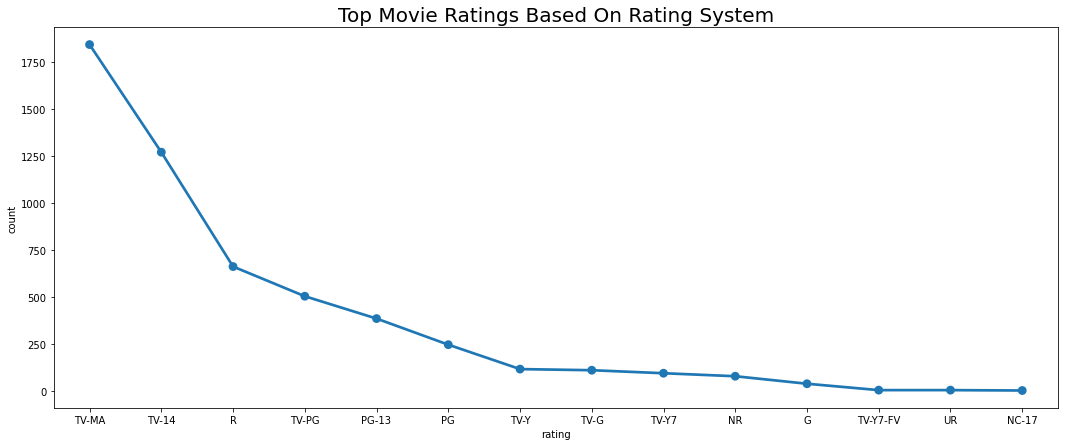

In [19]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count',ascending=False)

fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

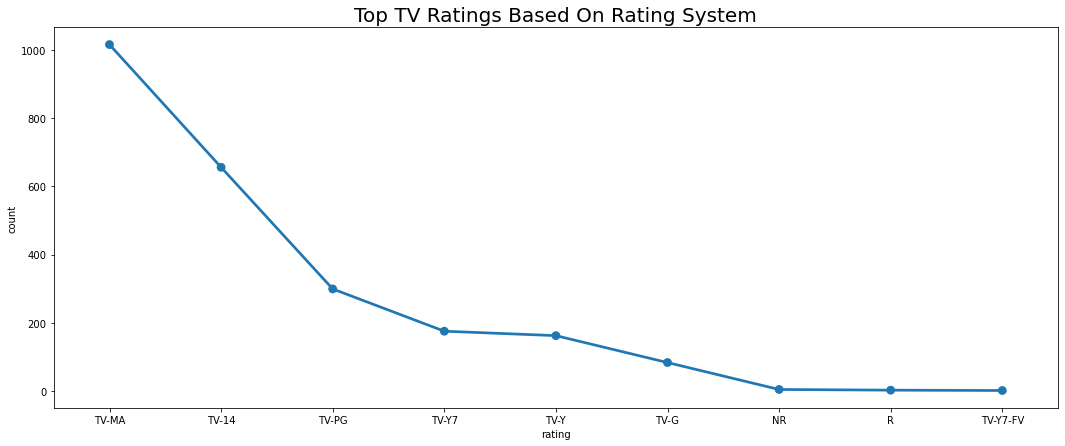

In [20]:
TV_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending=False)

fig.dims = (18,7)
fig,ax = plt.subplots(figsize=fig.dims)
sns.pointplot(x = 'rating', y = 'count', data = TV_ratings)
plt.title('Top TV Ratings Based On Rating System',size='20')
plt.show()

### Create subplots using plotly

In [21]:
rate_df = df.groupby(['rating','target_ages'])['show_id'].count().reset_index(name = 'count')
rate_df = rate_df.loc[rate_df['count'] != 0].sort_values(by = 'target_ages')
rate_df

rating target_ages  count
0          G        Kids     39
28      TV-G        Kids    194
40      TV-Y        Kids    279
13        PG  Older Kids    247
37     TV-PG  Older Kids    804
45     TV-Y7  Older Kids    270
49  TV-Y7-FV  Older Kids      6
18     PG-13       Teens    386
26     TV-14       Teens   1928
7      NC-17      Adults      3
11        NR      Adults     83
23         R      Adults    665
35     TV-MA      Adults   2861
55        UR      Adults      5

In [22]:
fig = px.bar(rate_df, x='rating', y='count',color='target_ages',title='Ratings of Movies And TV Shows Based On Target Age Groups',labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

### Create a bar chart to divide catergories 

In [23]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

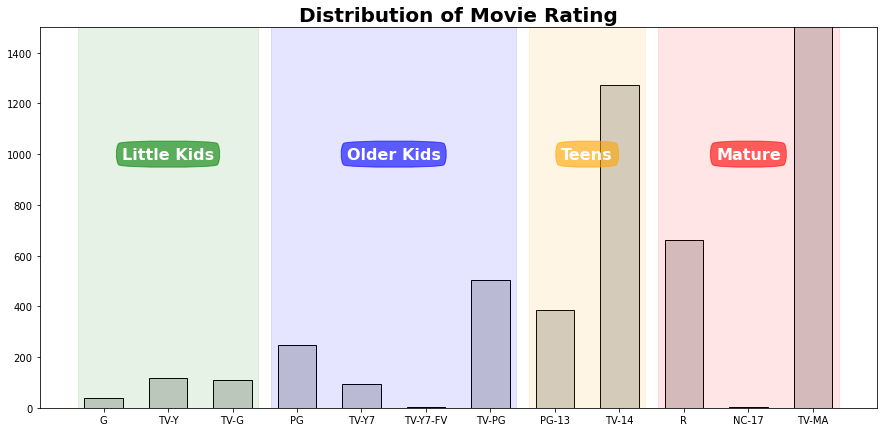

In [24]:
rating_barplot(movie_rating,'Movie', 1000, 1500)

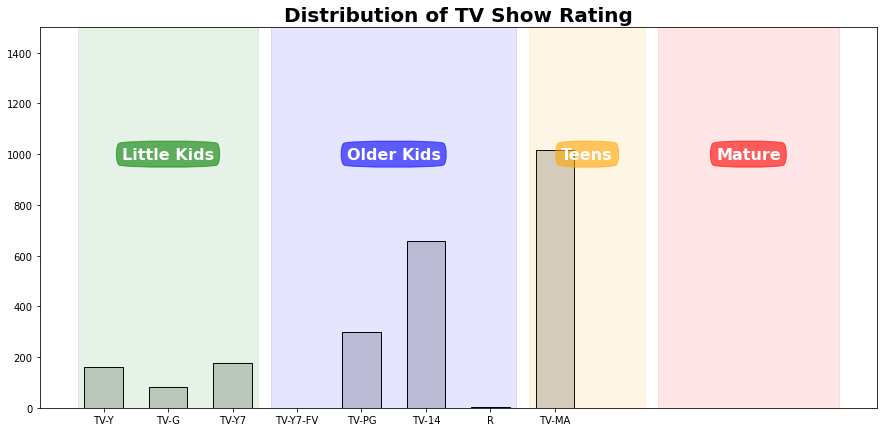

In [25]:
rating_barplot(tv_rating,'TV Show',1000,1500)

### Create Countplot

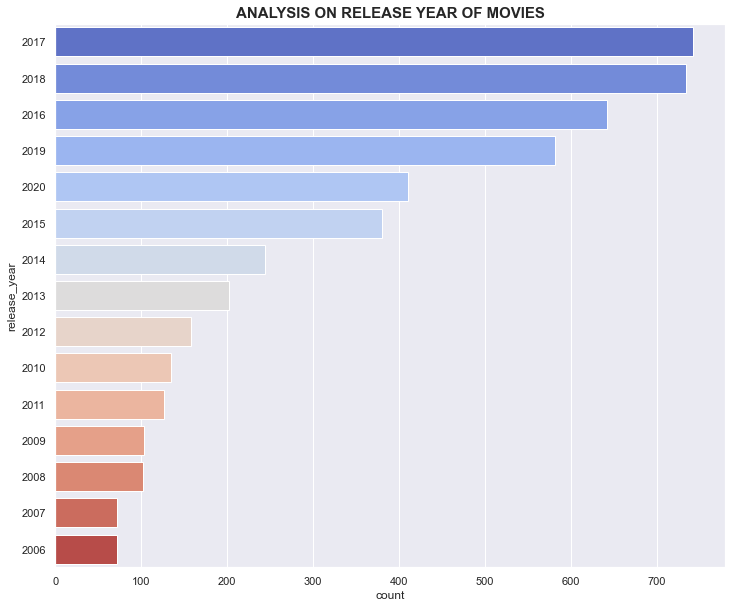

In [26]:
plt.figure(figsize=(12,10))

sns.set(style = 'darkgrid')
sns.countplot(y = 'release_year', data = df_movies,palette="coolwarm", order = df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

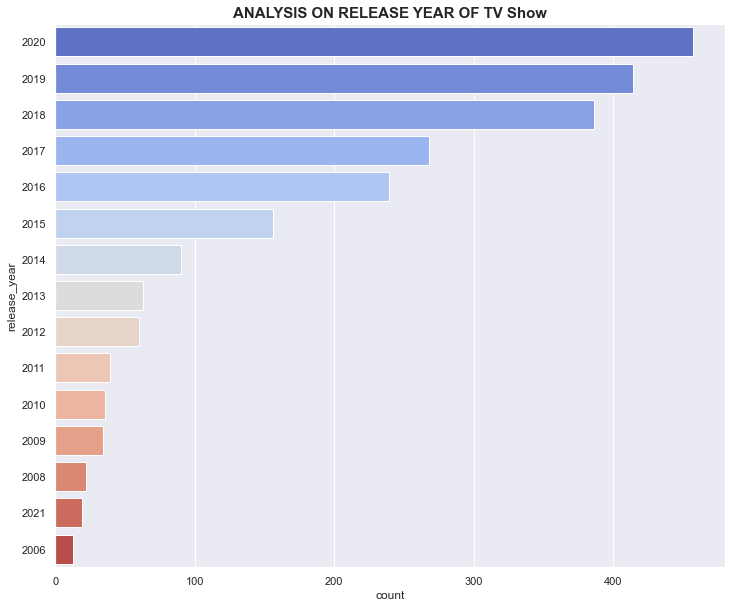

In [27]:
plt.figure(figsize=(12,10))

sns.set(style = 'darkgrid')
sns.countplot(y = 'release_year', data = df_tv, palette="coolwarm", order = df_tv['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

### Distribution of movie duration

In [28]:
# Package for normal distribution 
from scipy.stats import norm

C:\Users\vhao\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



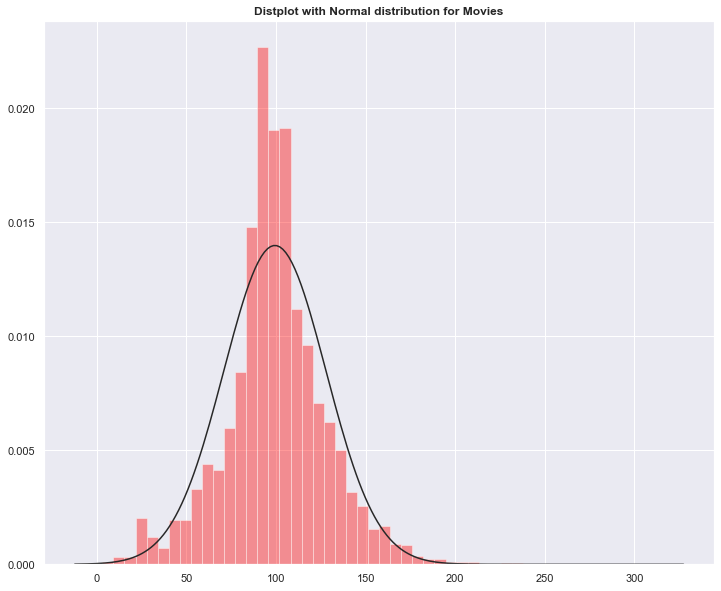

In [29]:
plt.figure(figsize=(12,10))

sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

In [30]:
fig = px.histogram(x=df_tv['duration'])
fig.update_xaxes(categoryorder="total descending")

fig.update_layout(
    title="Distribution of TV Shows duration",
    xaxis_title="Duration of TV ShowS",
)

fig.show()

### Top10 Genre in Movies and TV Shows:

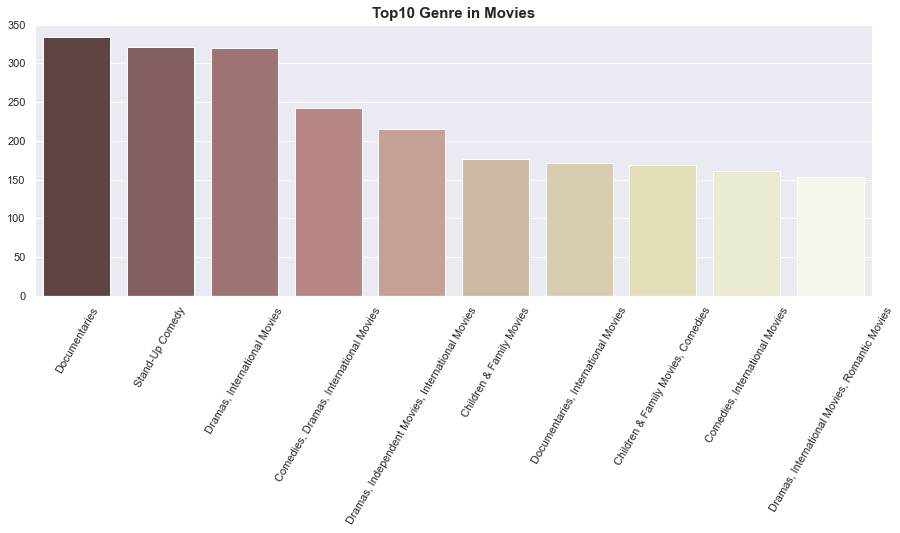

In [31]:
plt.figure(figsize=(15,5))



sns.barplot(x = df_movies['listed_in'].value_counts().head(10).index,
            y = df_movies['listed_in'].value_counts().head(10).values,palette="pink")

plt.xticks(rotation = 60)
plt.title("Top10 Genre in Movies",fontweight="bold", fontsize = 15)
plt.show()

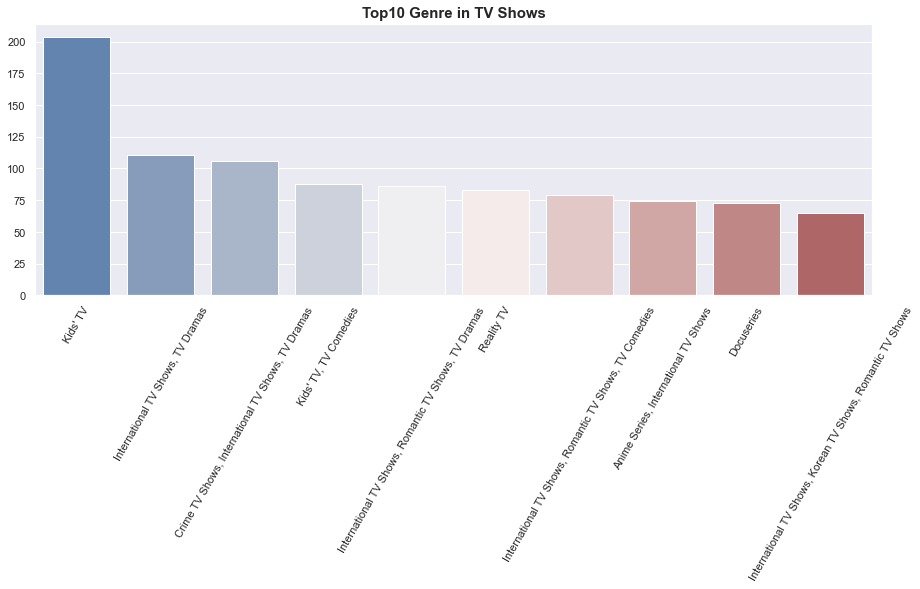

In [32]:
plt.figure(figsize = (15,5))


sns.barplot(x = df_tv['listed_in'].value_counts().head(10).index,
            y = df_tv['listed_in'].value_counts().head(10).values, palette = 'vlag')
plt.xticks(rotation=60)
plt.title("Top10 Genre in TV Shows",fontweight="bold",fontsize = 15)
plt.show()

### Top-20 countries producing most contents:

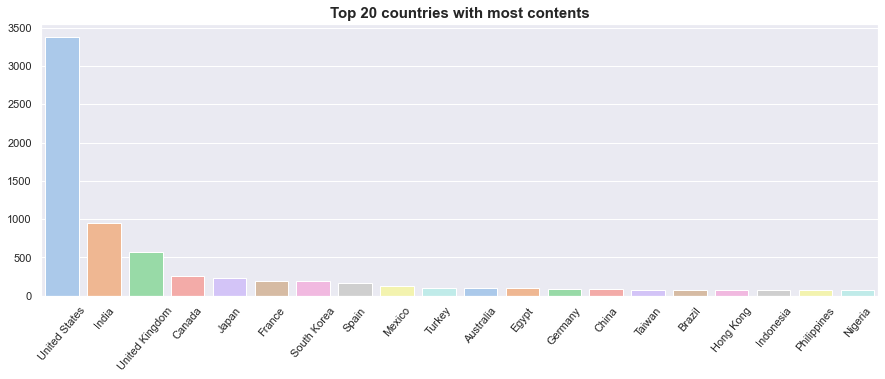

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['new_country'].value_counts().head(20).index , y=df['new_country'].value_counts().head(20).values, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

### World Cloud-Movie Genre

In [34]:
from wordcloud import WordCloud, STOPWORDS

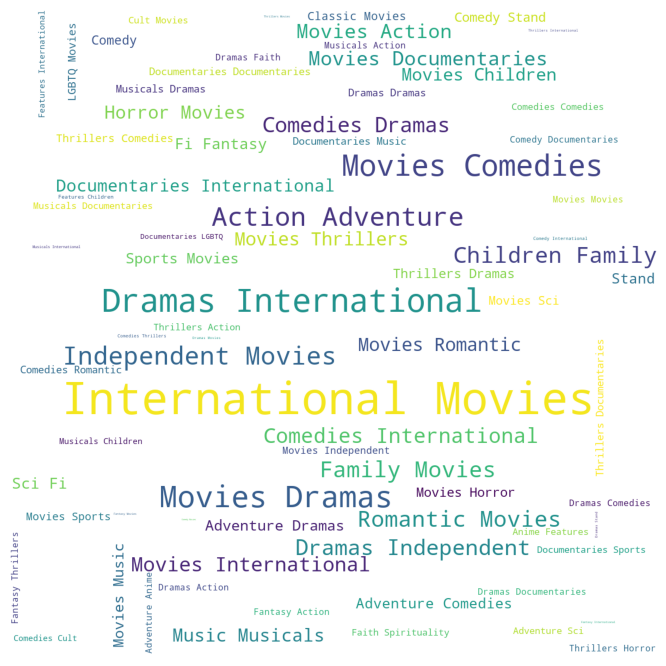

In [35]:
text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

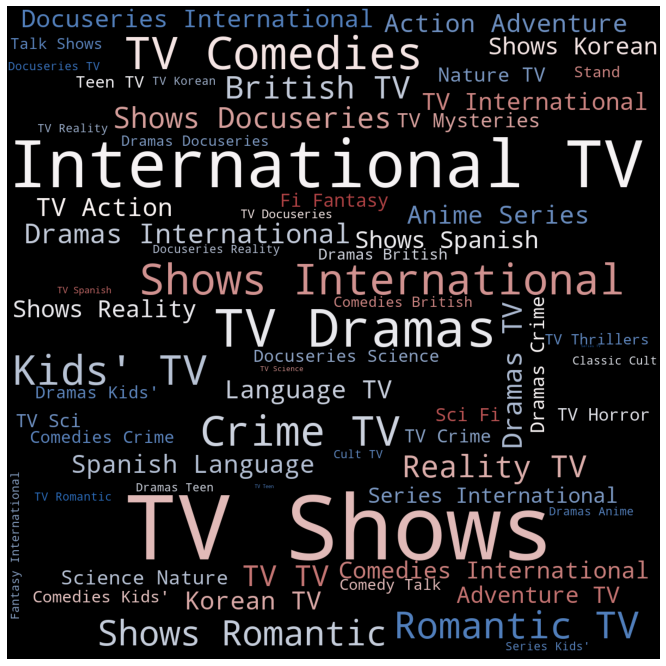

In [36]:
text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black', colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
countries = df['country'].value_counts()[df['country'].value_counts(normalize=True)> 0.005]
countries

United States                    3051
India                             923
United Kingdom                    396
Japan                             224
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          81
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Thailand                           57
China                              57
Hong Kong                          52
Argentina                          50
Canada, United States              42
Italy                              39
Name: countr

In [64]:
plt.figure(figsize=(14, 7))

figure = px.pie(countries.sort_values(ascending=False).iloc[:20], values=countries.values, names=countries.index,
                title='Content quantity by country in percentage', color_discrete_sequence=px.colors.sequential.RdBu)
figure.show()

<Figure size 1008x504 with 0 Axes>

In [69]:
display(df[df['type'] == 'TV Show'][['show_id','type','title','country','date_added','release_year','rating','duration','listed_in','description','new_country','year_added','month_added','target_ages']].sort_values(by = 'countr'.head(10).style.background_gradient(cmap="CMRmap_r"))